In [ ]:
"""
Задание 1

Напишите функцию, 
которая классифицирует фильмы из материалов занятия по следующим правилам:

оценка 2 и меньше - низкий рейтинг
оценка 4 и меньше - средний рейтинг
оценка 4.5 и 5 - высокий рейтинг
Результат классификации запишите в столбец class
"""
import pandas as pd

data = pd.read_csv('ratings.csv')

def new_class(rating):
  if rating <=2:
    new_class = 'low rating'
  elif rating <= 4:
    new_class = 'average rating'
  elif rating == 4.5 or rating == 5:
    new_class = 'high rating'
  return new_class

data['class'] = data['rating'].apply(new_class)
data.head()


,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,average rating
1,1,1029,3.0,1260759179,average rating
2,1,1061,3.0,1260759182,average rating
3,1,1129,2.0,1260759185,low rating
4,1,1172,4.0,1260759205,average rating


In [ ]:
"""
Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. 
Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ 
пишется название этого региона. Если поисковый запрос не содержит названия города,
 то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.
"""

def geo_class_region(keywords):
  keywords = keywords.lower()
  keywords_set = set(keywords.split())
  if keywords_set & set(['москва', 'тула', 'ярославль']):
    region = 'Центр'
  elif keywords_set & set(['петербург', 'псков', 'мурманск']):
    region = 'Северо-Запад'
  elif keywords_set & set(['владивосток', 'сахалин', 'хабаровск']):
    region = 'Дальний Восток'
  else:
    region = 'undefined'
  return region


data = pd.read_csv('keywords.csv')
data.head()
data['region'] = data['keyword'].apply(geo_class_region)
print(data['region'].unique())
data.head()

# спасибо stackoverflow. сама б каждый город по очереди проверила =)

['undefined' 'Центр' 'Северо-Запад' 'Дальний Восток']


,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [ ]:
"""
Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”.
 Ваша задача проверить это утверждение, 
 используя файлы с рейтингами фильмов из прошлого домашнего занятия 
 (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. 
Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

P/S/ все файлы находятся в архиве «дополнительные файлы к лекции и дз»

Важно! При копировании юпитер ноутбука изменяет кавычки ’ на ` , что может способствовать ошибки в коде. В данной ситуации необходимо их просто заменить.
"""
data_movies = pd.read_csv('movies.csv')
data_ratings = pd.read_csv('ratings.csv')

def production_year(movie):
  years  = list(range(1950,2011))
  for one_year in years:
    if str(one_year) in movie:
      return one_year
  return 1900
data_movies['year'] = data_movies['title'].apply(production_year)
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
data_group = data_ratings[['movieId','rating']].groupby('movieId')
data_group_rating = data_group.mean()
# фильм_ид , рейтинг
data_group_rating.head()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857


In [ ]:
data_movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
joined = data_movies.merge(data_group_rating, on='movieId', how='left')[['year', 'rating']]
joined.head()
# осталось сгрупировать по году. посчитать средний рейтинг для каждого и отсортировать
data_plot = joined.groupby('year').mean().sort_values('rating',ascending=False).reset_index()
# УРА! было не просто =)
joined

,year,rating
0,1995,3.872470
1,1995,3.401869
2,1995,3.161017
3,1995,2.384615
4,1995,3.267857
...,...,...
9120,1900,3.000000
9121,1900,NaN
9122,1900,5.000000
9123,1900,NaN


In [ ]:
data_plot

,year,rating
0,1951,3.906653
1,1952,3.802318
2,1962,3.772962
3,1953,3.738878
4,1957,3.693322
...,...,...
57,2002,3.191918
58,1997,3.183169
59,1990,3.166759
60,2003,3.154081


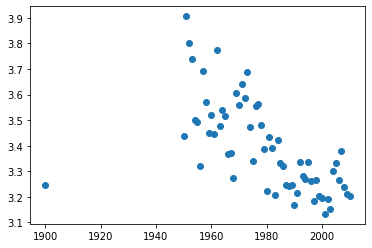

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_plot['year'], data_plot['rating'])
# тут должен построиться рейтинг от года. что точно поможет ответить на гипотезу:
# Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”.
#  Ваша задача проверить это утверждение,